### Mean Square Error (MSE) L2 Loss

In [1]:
import math
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
def SE_AE(Y_true, Y_pred):
    ''' Calculation of single Square Error and Absolute Error 
    '''
    SE = []
    AE = []
    for i in range(100):
        SE.append(mean_squared_error([Y_true[i]],[Y_pred[i]]))
        AE.append(mean_absolute_error([Y_true[i]], [Y_pred[i]]))
    
    return SE, AE

In [3]:
def generate_dummy(num, bnd_left, bnd_right):
    return np.linspace(bnd_left, bnd_right, num=num)

In [4]:
Y_true = generate_dummy(100, 0, 0)
Y_pred = generate_dummy(100, -5, 5) # Y_pred = Y' (Hypothesis)

In [5]:
SE, AE = SE_AE(Y_true, Y_pred)

In [6]:
def plot_help(Y_pred, losses, y_label, x_label, scatter_label, **kwargs):
    title = kwargs.get('title', '')
    plt.plot(Y_pred, losses)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.grid(True)
    plt.scatter(0, 0, c='r', label=scatter_label,alpha=0.9, edgecolors='none')
    plt.legend()
    plt.title(f'{title} {np.mean(losses)}')
    plt.show()

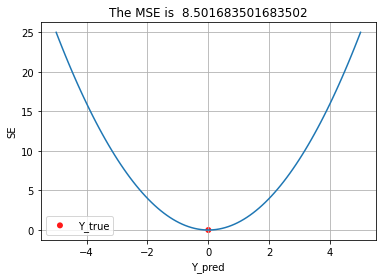

In [7]:
mse_kwargs = {'title':'The MSE is '}
plot_help(Y_pred, SE, 'SE', 'Y_pred', 'Y_true', **mse_kwargs)

#### Normal Distribution

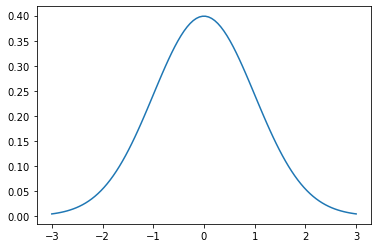

In [8]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

### Mean Absolute Error (MAE) L1 loss 

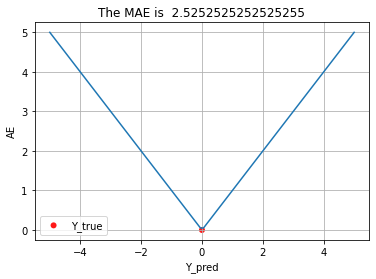

In [9]:
mae_kwargs = {'title':'The MAE is '}
plot_help(Y_pred, AE, 'AE', 'Y_pred', 'Y_true', **mae_kwargs)

#### Laplace Distribution 

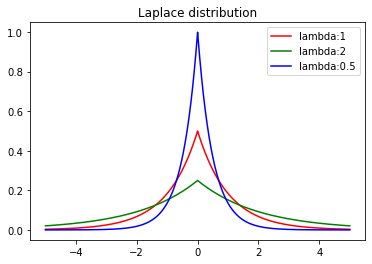

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def laplace_function(x, lambda_):
    return (1/(2*lambda_)) * np.e**(-1*(np.abs(x)/lambda_))

x = generate_dummy(10000, -5, 5)
y1 = [laplace_function(x_,1) for x_ in x]
y2 = [laplace_function(x_,2) for x_ in x]
y3 = [laplace_function(x_,0.5) for x_ in x]

plt.plot(x, y1, color='r', label="lambda:1")
plt.plot(x, y2, color='g', label="lambda:2")
plt.plot(x, y3, color='b', label="lambda:0.5")

plt.title("Laplace distribution")
plt.legend()
plt.show()

#### Compare L1 and L2 

In [11]:
Y_true_small = generate_dummy(100, 0, 0)
Y_pred_small = generate_dummy(100, -1.5, 1.5) # Y_pred = Y' (Hypothesis)

SE_small, AE_small = SE_AE(Y_true_small, Y_pred_small)

Y_true_big = generate_dummy(100, 0, 0)
Y_pred_big = generate_dummy(100, -10, 10) # Y_pred = Y' (Hypothesis)
SE_big, AE_big = SE_AE(Y_true_big, Y_pred_big)

In [12]:
def plot_help_compare(ax, Y_pred, losses, y_label, x_label, scatter_label, **kwargs):
    ax.plot(Y_pred[0], losses[0], label='MSE')
    ax.plot(Y_pred[1], losses[1], label='MAE')
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.grid(True)
    ax.scatter(0, 0, c='r', label=scatter_label,alpha=0.9, edgecolors='none')
    ax.legend()

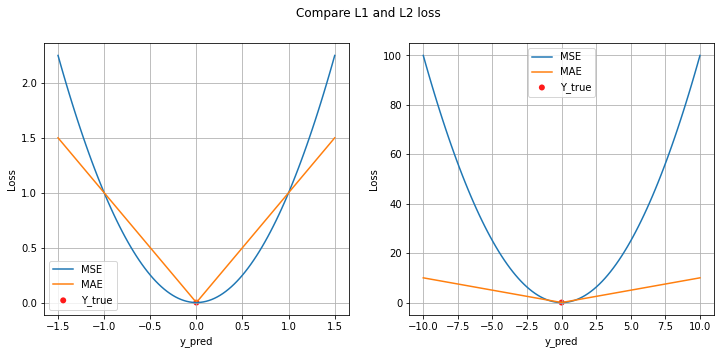

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))  
fig.suptitle('Compare L1 and L2 loss')
plot_help_compare(ax1, 
                  [Y_pred_small, Y_pred_small],
                  [SE_small, AE_small],
                  'Loss', 
                  'y_pred', 
                  'Y_true')

plot_help_compare(ax2, 
                  [Y_pred_big, Y_pred_big],
                  [SE_big, AE_big],
                  'Loss', 
                  'y_pred', 
                  'Y_true')
